<a href="https://colab.research.google.com/github/ccseibell/LoRA_complexity/blob/main/results/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#The path to the LoRA weights in my google drive
!ls /content/drive/MyDrive/FA\ 2024/Kilian\'s\ ML\ Class/BERT\-language/Lora_matrices_2class/lora_params.pt

"/content/drive/MyDrive/FA 2024/Kilian's ML Class/BERT-language/Lora_matrices_2class/lora_params.pt"


In [ ]:
# Specify the file path
file_path = "/content/drive/MyDrive/FA 2024/Kilian's ML Class/BERT-language/Lora_matrices_2class/lora_params.pt"


# Load the .pt file
model = torch.load(file_path, map_location=torch.device('cpu'))  # Use 'cuda' if you want to load to GPU

# Inspect the contents (if it's a dictionary or structured object)
if isinstance(model, dict):
    print(model.keys())

<ipython-input-3-33412a6e76d8>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(file_path, map_location=torch.device('cpu'))  # Use 'cuda' if you want to 

dict_keys(['base_model.model.bert.encoder.layer.0.attention.self.query.lora_A.default.weight', 'base_model.model.bert.encoder.layer.0.attention.self.query.lora_B.default.weight', 'base_model.model.bert.encoder.layer.0.attention.self.key.lora_A.default.weight', 'base_model.model.bert.encoder.layer.0.attention.self.key.lora_B.default.weight', 'base_model.model.bert.encoder.layer.0.attention.self.value.lora_A.default.weight', 'base_model.model.bert.encoder.layer.0.attention.self.value.lora_B.default.weight', 'base_model.model.bert.encoder.layer.1.attention.self.query.lora_A.default.weight', 'base_model.model.bert.encoder.layer.1.attention.self.query.lora_B.default.weight', 'base_model.model.bert.encoder.layer.1.attention.self.key.lora_A.default.weight', 'base_model.model.bert.encoder.layer.1.attention.self.key.lora_B.default.weight', 'base_model.model.bert.encoder.layer.1.attention.self.value.lora_A.default.weight', 'base_model.model.bert.encoder.layer.1.attention.self.value.lora_B.defaul

In [ ]:
import torch
from tqdm import tqdm
from collections import defaultdict

#We need this because we have a dict, not a model
def perform_lora_svd_from_dict(data):
    """Extract singular values from LoRA weights in a dictionary and structure them by layer."""
    svd_results = defaultdict(lambda: {"query": [], "key": [], "value": []})  # Default structure for each layer (in a regular model)

    for key in tqdm(data.keys()):
        if "lora_A" in key:  # Process only lora_A weights
            # Derive corresponding lora_B key (we assume the names are unqiue because they are dict keys)
            lora_B_key = key.replace("lora_A", "lora_B")

            if lora_B_key in data:

                # Parse layer index
                try:
                    layer_idx = int(key.split(".")[5])  # Extract layer index (e.g., "0")
                except (IndexError, ValueError):
                    raise ValueError(f"Unexpected key format: {key}")

                # Parse matrix type
                try:
                    matrix_type = key.split(".")[8]  # Extract matrix type (e.g., "query")
                except IndexError:
                    raise ValueError(f"Unexpected key format: {key}")

                # Validate matrix type
                if matrix_type not in ["query", "key", "value"]:
                    raise ValueError(f"Unexpected matrix type in key: {key}")

                # Load lora_A and lora_B weights
                lora_A = data[key]
                lora_B = data[lora_B_key]

                # Combine LoRA matrices
                lora_weight = torch.mm(lora_B, lora_A)

                # Perform SVD
                U, S, Vt = torch.svd(lora_weight.detach())

                # Store singular values in the appropriate layer and matrix type
                svd_results[f'layer_{layer_idx}'][matrix_type] = S.cpu().numpy().tolist()
            else:
                raise ValueError(f"No pair found for lora_a with key: {key}")

    return dict(svd_results)  # Convert defaultdict to a regular dictionary

In [ ]:
svd_results = perform_lora_svd_from_dict(model)

100%|██████████| 72/72 [00:05<00:00, 13.76it/s]


In [ ]:
print(svd_results)

{'layer_0': {'query': [0.24272164702415466, 0.11513334512710571, 0.11058513820171356, 0.0938003659248352, 0.08677131682634354, 0.06463181227445602, 0.06323359906673431, 0.060076504945755005, 0.05338817462325096, 0.05104505643248558, 0.0485595241189003, 0.04684624448418617, 0.045727670192718506, 0.04485424980521202, 0.04365568980574608, 0.042171087116003036, 0.04128720238804817, 0.040228329598903656, 0.039535291492938995, 0.0379791334271431, 0.03685822710394859, 0.03658151999115944, 0.03574337810277939, 0.03505963087081909, 0.034114543348550797, 0.03339097648859024, 0.03273707628250122, 0.03216185048222542, 0.031884025782346725, 0.031411174684762955, 0.030171731486916542, 0.029865475371479988, 0.029668638482689857, 0.029360171407461166, 0.029146237298846245, 0.02876848168671131, 0.028196725994348526, 0.027689045295119286, 0.027373548597097397, 0.027181677520275116, 0.026582233607769012, 0.0259834174066782, 0.02579643204808235, 0.025513701140880585, 0.025116192176938057, 0.02462748996913

In [ ]:
print(svd_results.keys())
print(model.keys())

dict_keys(['layer_0', 'layer_1', 'layer_2', 'layer_3', 'layer_4', 'layer_5', 'layer_6', 'layer_7', 'layer_8', 'layer_9', 'layer_10', 'layer_11'])
dict_keys(['base_model.model.bert.encoder.layer.0.attention.self.query.lora_A.default.weight', 'base_model.model.bert.encoder.layer.0.attention.self.query.lora_B.default.weight', 'base_model.model.bert.encoder.layer.0.attention.self.key.lora_A.default.weight', 'base_model.model.bert.encoder.layer.0.attention.self.key.lora_B.default.weight', 'base_model.model.bert.encoder.layer.0.attention.self.value.lora_A.default.weight', 'base_model.model.bert.encoder.layer.0.attention.self.value.lora_B.default.weight', 'base_model.model.bert.encoder.layer.1.attention.self.query.lora_A.default.weight', 'base_model.model.bert.encoder.layer.1.attention.self.query.lora_B.default.weight', 'base_model.model.bert.encoder.layer.1.attention.self.key.lora_A.default.weight', 'base_model.model.bert.encoder.layer.1.attention.self.key.lora_B.default.weight', 'base_model

In [ ]:
def plot_lora_svd_singular_values(svd_results):
    """
    Plot singular values, with the x-axis as the index and y-axis as the value of the singular value.
    One row per layer, columns for matrix types.
    """
    num_layers = len(svd_results)
    matrix_types = ['query', 'key', 'value']

    # Create figure with one row per layer
    fig, axes = plt.subplots(num_layers, 3, figsize=(15, 4*num_layers))
    fig.suptitle('Singular Values in LoRA Weights', fontsize=16)

    for layer_idx, (layer_key, layer_data) in enumerate(svd_results.items()):
        for matrix_idx, matrix_name in enumerate(matrix_types):
            singular_values = layer_data[matrix_name]

            # Plot singular values
            axes[layer_idx, matrix_idx].plot(range(len(singular_values)), singular_values, marker='o')
            axes[layer_idx, matrix_idx].set_title(f'{layer_key} - {matrix_name} Matrix')
            axes[layer_idx, matrix_idx].set_xlabel('Index')
            axes[layer_idx, matrix_idx].set_ylabel('Singular Value')

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

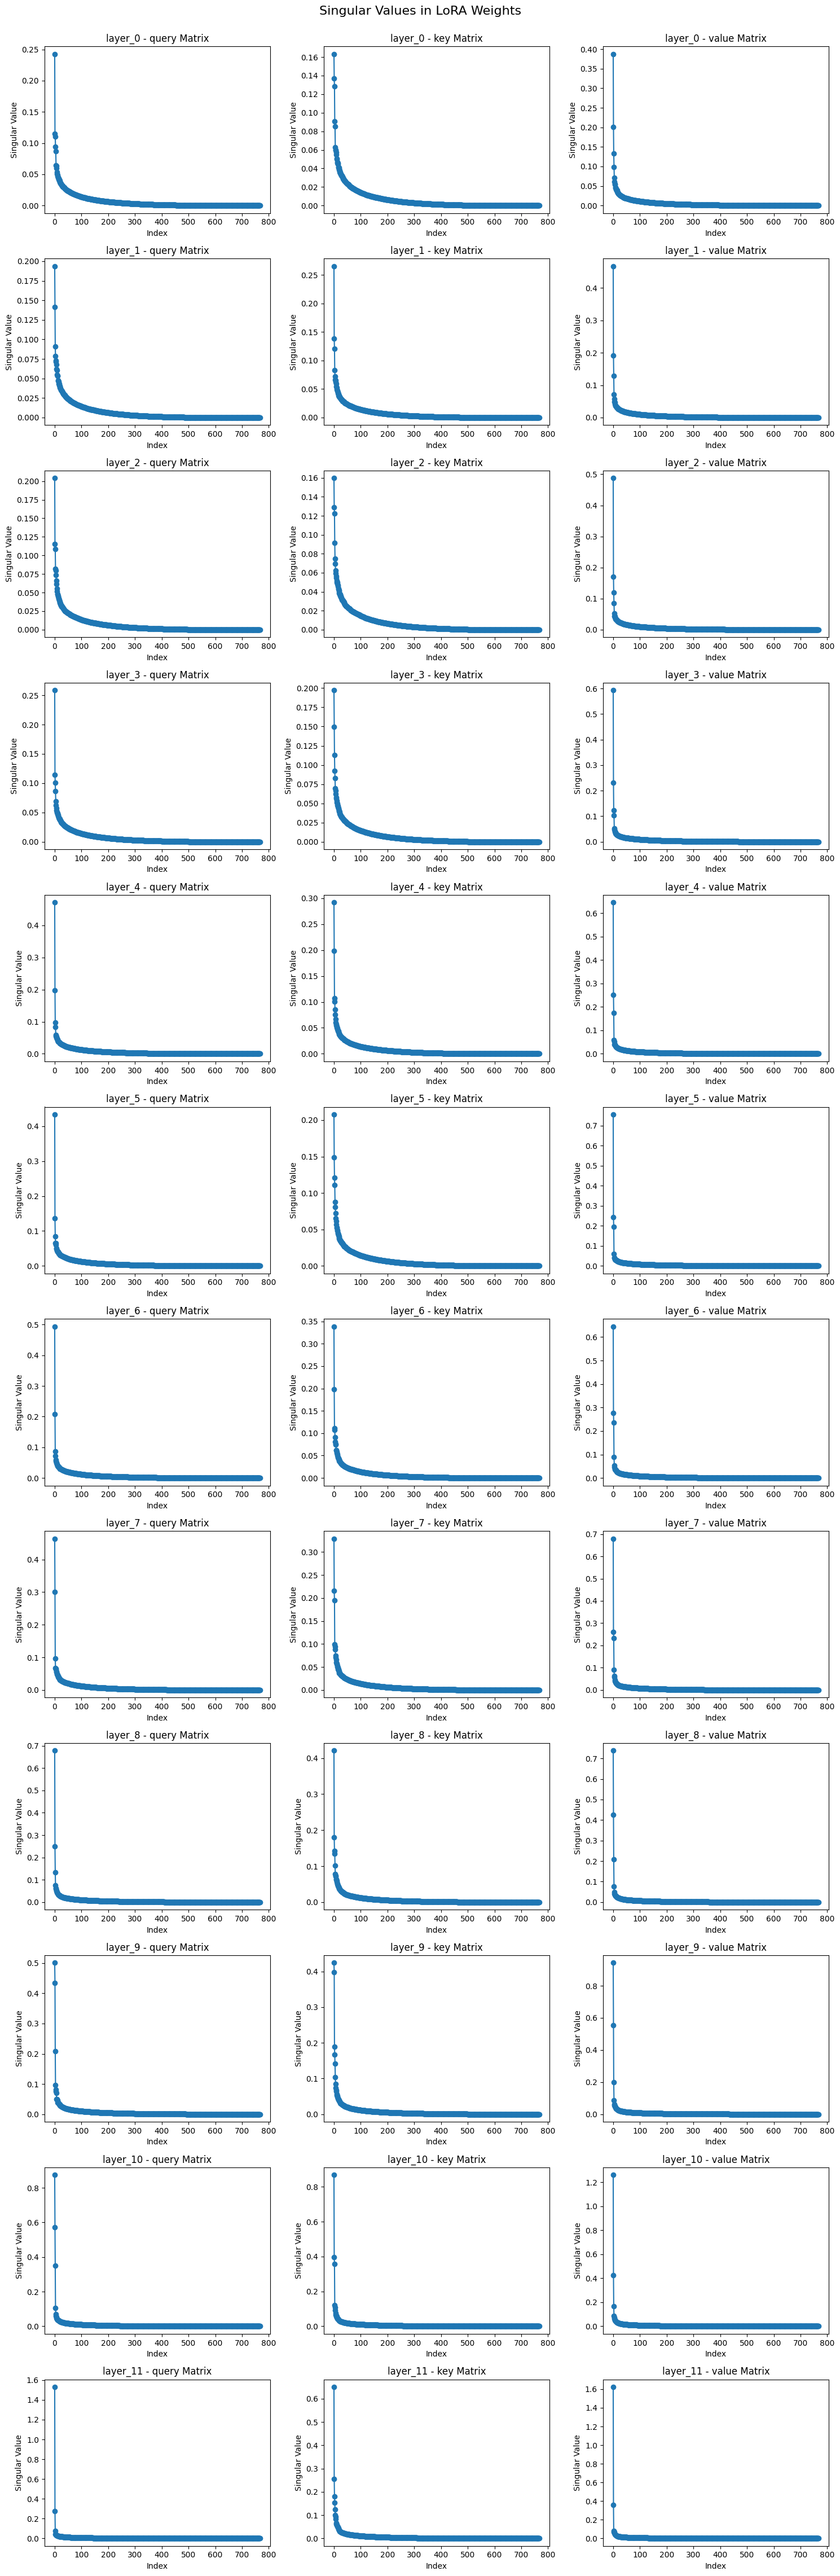

In [ ]:
plot_lora_svd_singular_values(svd_results)

In [ ]:
#Preprocessing
import numpy as np

# Convert svd_results into a more convenient form
# Extract layer indices and ensure they are sorted
layers = sorted(svd_results.keys(), key=lambda x: int(x.split('_')[1]))
layer_indices = [int(l.split('_')[1]) for l in layers]

# Available matrix types
matrix_types = ['query', 'key', 'value']

In [ ]:
# #SVD per Layer and matrix type
# for l in layers:
#     fig, ax = plt.subplots()
#     for mt in matrix_types:
#         if mt in svd_results[l]:
#             S = svd_results[l][mt]
#             ax.plot(np.arange(1, len(S)+1), S, marker='o', label=mt)

#     ax.set_title(f'Singular Values for {l}')
#     ax.set_xlabel('Singular Value Index')
#     ax.set_ylabel('Singular Value Magnitude')
#     ax.legend()
#     plt.show()

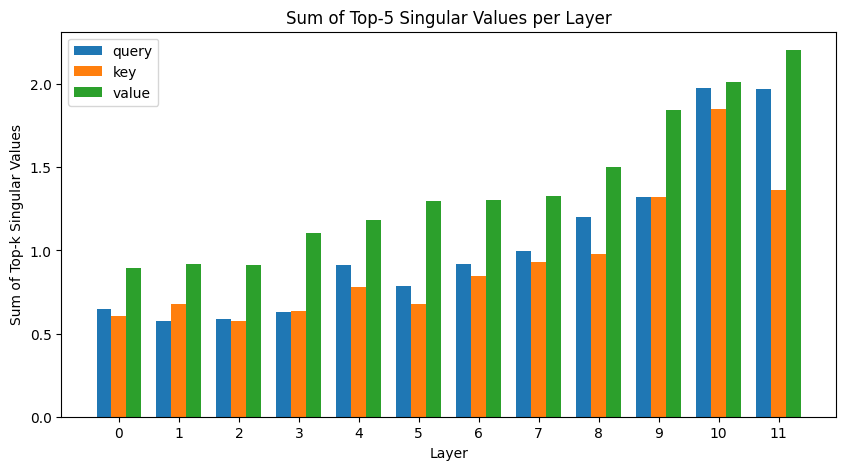

In [ ]:
k = 5
top_k_sums = {l: {mt: np.sum(svd_results[l][mt][:k]) for mt in matrix_types} for l in layers}

fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(layers))
width = 0.25

for i, mt in enumerate(matrix_types):
    vals = [top_k_sums[l][mt] for l in layers]
    ax.bar(x + i*width, vals, width, label=mt)

ax.set_xticks(x + width)
ax.set_xticklabels(layer_indices)
ax.set_title(f'Sum of Top-{k} Singular Values per Layer')
ax.set_xlabel('Layer')
ax.set_ylabel('Sum of Top-k Singular Values')
ax.legend()
plt.show()

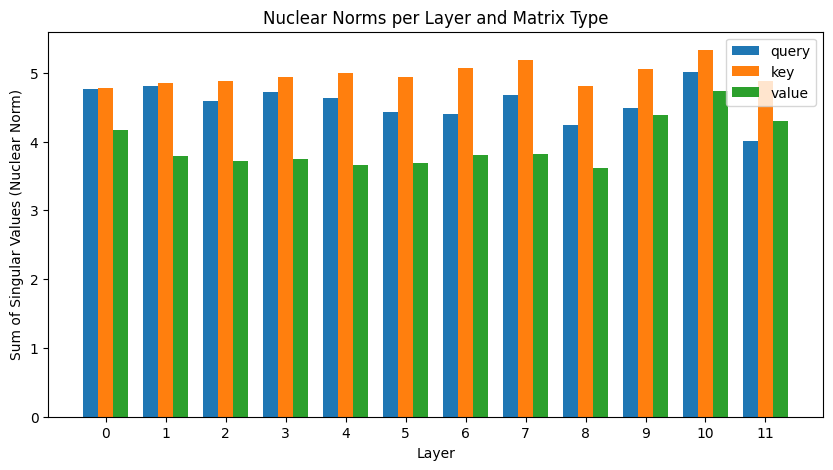

In [ ]:
nuclear_norms = {l: {mt: np.sum(svd_results[l][mt]) for mt in matrix_types} for l in layers}

fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(layers))
width = 0.25

for i, mt in enumerate(matrix_types):
    vals = [nuclear_norms[l][mt] for l in layers]
    ax.bar(x + i*width, vals, width, label=mt)

ax.set_xticks(x + width)
ax.set_xticklabels(layer_indices)
ax.set_title('Nuclear Norms per Layer and Matrix Type')
ax.set_xlabel('Layer')
ax.set_ylabel('Sum of Singular Values (Nuclear Norm)')
ax.legend()
plt.show()

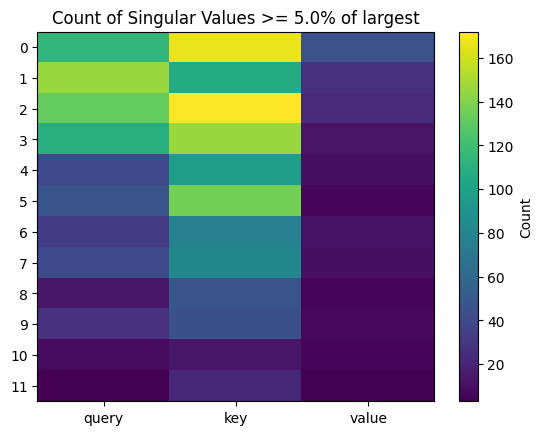

In [ ]:
threshold_ratio = 0.05
significant_counts = np.zeros((len(layers), len(matrix_types)))

for i, l in enumerate(layers):
    for j, mt in enumerate(matrix_types):
        S = np.array(svd_results[l][mt])
        thresh = threshold_ratio * S[0] if len(S) > 0 else 0
        significant_counts[i, j] = np.sum(S >= thresh)

fig, ax = plt.subplots()
im = ax.imshow(significant_counts, cmap='viridis', aspect='auto')

ax.set_yticks(np.arange(len(layers)))
ax.set_yticklabels(layer_indices)
ax.set_xticks(np.arange(len(matrix_types)))
ax.set_xticklabels(matrix_types)

ax.set_title(f'Count of Singular Values >= {threshold_ratio*100}% of largest')
plt.colorbar(im, ax=ax, label='Count')
plt.show()

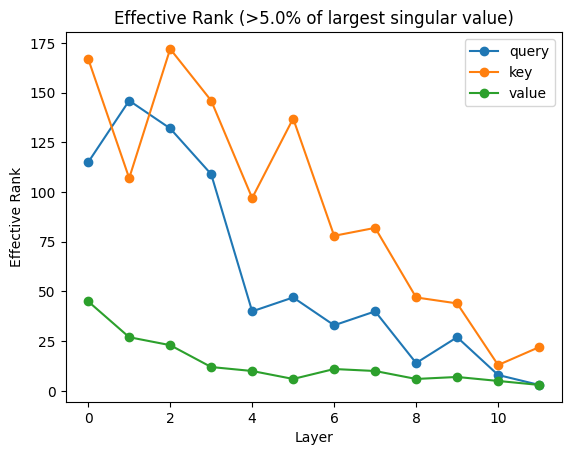

In [ ]:
threshold_ratio = 0.05
effective_rank = {mt: [] for mt in matrix_types}

for l in layers:
    for mt in matrix_types:
        S = np.array(svd_results[l][mt])
        if len(S) == 0:
            effective_rank[mt].append(0)
        else:
            thresh = threshold_ratio * S[0]
            count = np.sum(S >= thresh)
            effective_rank[mt].append(count)

fig, ax = plt.subplots()
for mt in matrix_types:
    ax.plot(layer_indices, effective_rank[mt], marker='o', label=mt)

ax.set_title(f'Effective Rank (>{threshold_ratio*100}% of largest singular value)')
ax.set_xlabel('Layer')
ax.set_ylabel('Effective Rank')
ax.legend()
plt.show()


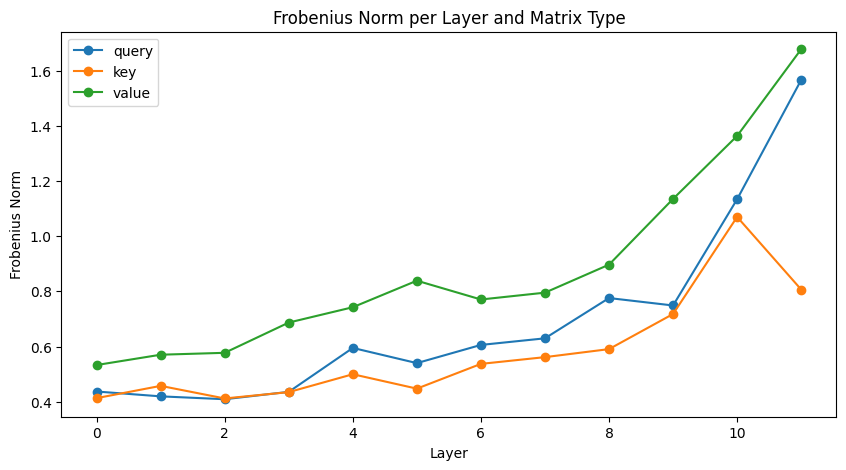

In [ ]:
frob_norms = {l: {mt: np.sqrt(np.sum(np.array(svd_results[l][mt])**2)) for mt in matrix_types} for l in layers}

fig, ax = plt.subplots(figsize=(10,5))
for mt in matrix_types:
    vals = [frob_norms[l][mt] for l in layers]
    ax.plot(layer_indices, vals, marker='o', label=mt)

ax.set_title('Frobenius Norm per Layer and Matrix Type')
ax.set_xlabel('Layer')
ax.set_ylabel('Frobenius Norm')
ax.legend()
plt.show()

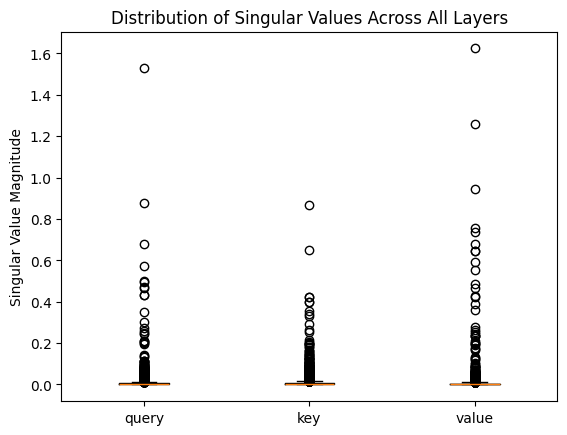

In [ ]:
agg_values = {mt: [] for mt in matrix_types}
for l in layers:
    for mt in matrix_types:
        agg_values[mt].extend(svd_results[l][mt])

fig, ax = plt.subplots()
ax.boxplot([agg_values[mt] for mt in matrix_types], labels=matrix_types)
ax.set_title('Distribution of Singular Values Across All Layers')
ax.set_ylabel('Singular Value Magnitude')
plt.show()

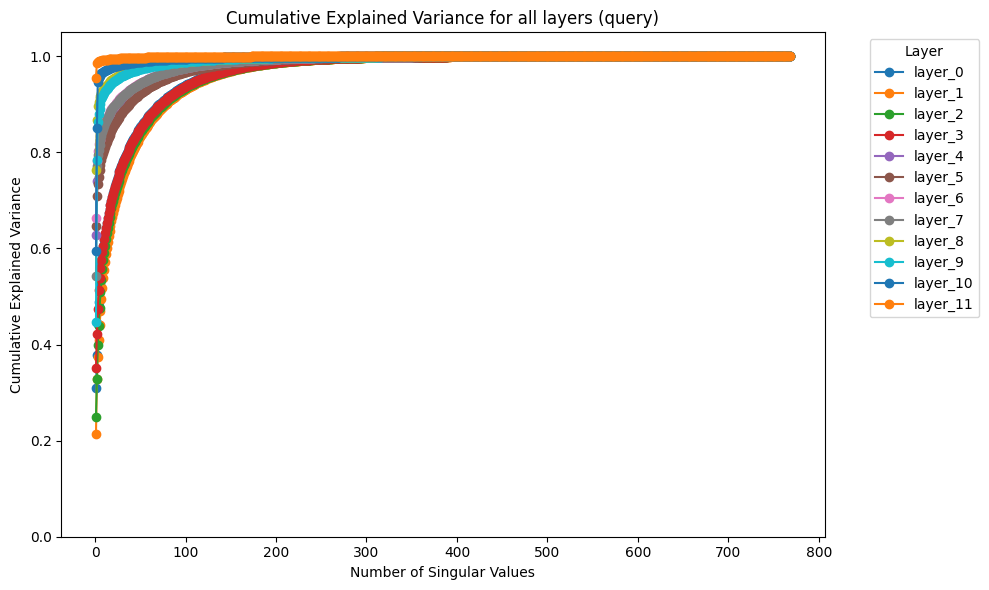

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

matrix_type = 'query'  # You can pick 'query', 'key', or 'value'

fig, ax = plt.subplots(figsize=(10, 6))

for l in layers:
    S = np.array(svd_results[l][matrix_type])
    if len(S) > 0:
        total_var = np.sum(S**2)
        cev = np.cumsum(S**2) / total_var
        ax.plot(np.arange(1, len(S)+1), cev, marker='o', label=f"{l}")
    else:
        # If no singular values for this type/layer, skip
        continue

ax.set_title(f'Cumulative Explained Variance for all layers ({matrix_type})')
ax.set_xlabel('Number of Singular Values')
ax.set_ylabel('Cumulative Explained Variance')
ax.set_ylim([0, 1.05])
ax.legend(title='Layer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#---raph's stuff below

In [ ]:
stat_data = svd_results

In [ ]:
import numpy as np

def gini_coefficient(x):
    """
    Calculate the Gini coefficient of a numpy array.

    Args:
    x (numpy.ndarray): Array of numeric values

    Returns:
    float: Gini coefficient
    """
    # Handle empty array
    if len(x) == 0:
        return 0.0

    # Sort the array
    x = np.sort(x)

    # Calculate the cumulative sum and normalize
    index = np.arange(1, len(x) + 1)
    n = len(x)

    return (np.sum((2 * index - n - 1) * x)) / (n * np.sum(x))

def energy_ratio_test_count(x, energy_threshold=0.95):
    """
    Implements the Energy Ratio Test and returns the count of significant values of x.

    Parameters:
    - x (list or np.ndarray): List of floating point values.
    - energy_threshold (float): Threshold for cumulative energy (default is 0.95).

    Returns:
    - count (int): Number of floating point values in the list contributing to the specified energy threshold.
    """
    # Compute cumulative energy
    x = np.array(x)
    cumulative_energy = np.cumsum(x ** 2) / np.sum(x ** 2)

    # Find the count of significant singular values
    significant_indices = np.where(cumulative_energy >= energy_threshold)[0]
    count = significant_indices[0] + 1 if significant_indices.size > 0 else len(x)

    return count

# def elbow_method_count(x):
#     """
#     Implements the Elbow Method and returns the count of floating point values up to the elbow point.

#     Parameters:
#     - x (list or np.ndarray): List of floating point values.

#     Returns:
#     - count (int): Number of singular values up to the elbow point.
#     """
#     x = np.array(x)

#     # Normalize the indices and values for better scaling
#     indices = np.arange(len(x))
#     x = indices / indices.max()
#     y = x / x.max()

#     # Calculate the line from the first to the last point
#     start = np.array([0, y[0]])
#     end = np.array([1, y[-1]])
#     line_vector = end - start

#     print("line vector", line_vector)
#     # Compute perpendicular distance from each point to the line
#     point_vectors = np.stack([x, y], axis=1) - start
#     line_length = np.linalg.norm(line_vector)
#     print("line length", line_length)
#     print("point vectors", point_vectors)
#     print("cross value ", np.cross(line_vector, point_vectors))
#     distances = np.abs(np.cross(line_vector, point_vectors)) / line_length
#     print(distances)
#     # The elbow is the point with the maximum distance
#     elbow_index = np.argmax(distances)

#     # Count is elbow index + 1 (inclusive of the index)
#     count = elbow_index + 1

#     return count

def plot_histogram(data, bins=10, title='Distribution Histogram', xlabel='Value'):
    """
    Plot a histogram of floating-point values.
    """
    # Convert input to numpy array
    data_array = np.array(data)

    # Create figure and axis
    plt.figure(figsize=(8, 5))

    # Plot histogram
    plt.hist(data_array, bins=bins, edgecolor="black")

    # Set labels and title
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

    # Add grid for better readability
    plt.grid(linestyle='--')

    # Compute and display some basic statistics
    plt.annotate(f'Mean: {np.mean(data_array):.2f}\n'
                 f'Median: {np.median(data_array):.2f}\n'
                 f'Std Dev: {np.std(data_array):.2f}',
                 xy=(0.95, 0.95), xycoords='axes fraction',
                 horizontalalignment='right',
                 verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    # Adjust layout
    plt.tight_layout()

    return plt.show()

In [ ]:
#fixed

def elbow_method_count(x):
    """
    Implements the Elbow Method and returns the count of floating point values up to the elbow point.

    Parameters:
    - x (list or np.ndarray): List of floating point values.

    Returns:
    - count (int): Number of singular values up to the elbow point.
    """
    x = np.array(x)  # Singular values

    # Normalize the indices and singular values for better scaling
    indices = np.arange(len(x))
    # normalized_x = indices / indices.max()  # Normalize indices
    normalized_x = indices
    # normalized_y = x / x.max()  # Normalize singular values
    normalized_y = x

    # Calculate the line from the first to the last point
    start = np.array([normalized_x[0], normalized_y[0]])
    end = np.array([normalized_x[-1], normalized_y[-1]])
    line_vector = end - start

    # Compute perpendicular distance from each point to the line
    point_vectors = np.stack([normalized_x, normalized_y], axis=1) - start
    line_length = np.linalg.norm(line_vector)
    distances = np.abs(np.cross(line_vector, point_vectors)) / line_length

    # The elbow is the point with the maximum distance
    elbow_index = np.argmax(distances)

    # Count is elbow index + 1 (inclusive of the index)
    count = elbow_index + 1

    return count

In [ ]:
print(stat_data)

{'layer_0': {'query': [0.24272164702415466, 0.11513334512710571, 0.11058513820171356, 0.0938003659248352, 0.08677131682634354, 0.06463181227445602, 0.06323359906673431, 0.060076504945755005, 0.05338817462325096, 0.05104505643248558, 0.0485595241189003, 0.04684624448418617, 0.045727670192718506, 0.04485424980521202, 0.04365568980574608, 0.042171087116003036, 0.04128720238804817, 0.040228329598903656, 0.039535291492938995, 0.0379791334271431, 0.03685822710394859, 0.03658151999115944, 0.03574337810277939, 0.03505963087081909, 0.034114543348550797, 0.03339097648859024, 0.03273707628250122, 0.03216185048222542, 0.031884025782346725, 0.031411174684762955, 0.030171731486916542, 0.029865475371479988, 0.029668638482689857, 0.029360171407461166, 0.029146237298846245, 0.02876848168671131, 0.028196725994348526, 0.027689045295119286, 0.027373548597097397, 0.027181677520275116, 0.026582233607769012, 0.0259834174066782, 0.02579643204808235, 0.025513701140880585, 0.025116192176938057, 0.02462748996913

In [ ]:
gini_coeffs, energy_counts, elbow_counts = [], [], []
for k, v in stat_data.items():
    for att_type in ['query', 'key', 'value']:
        gini_coeffs.append(gini_coefficient(v[att_type]))
        energy_counts.append(energy_ratio_test_count(v[att_type], energy_threshold=0.95))
        elbow_counts.append(elbow_method_count(v[att_type]))

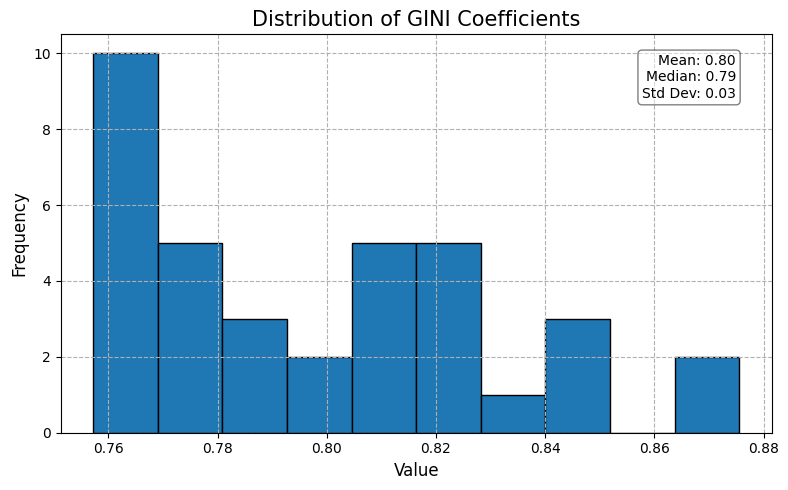

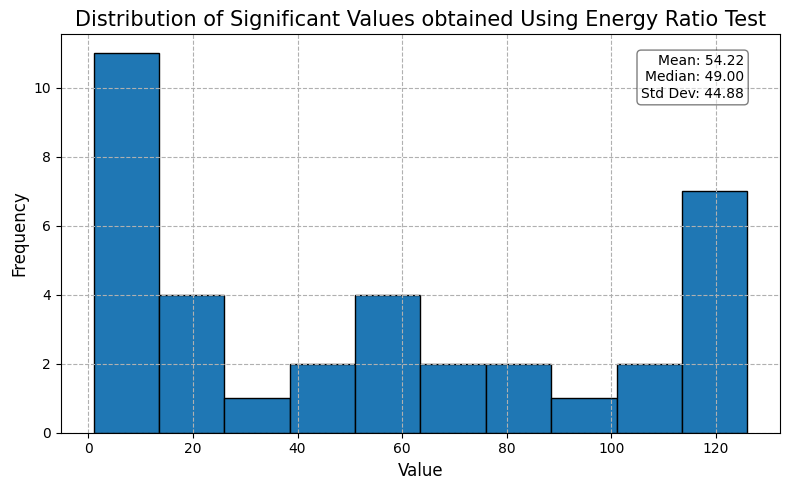

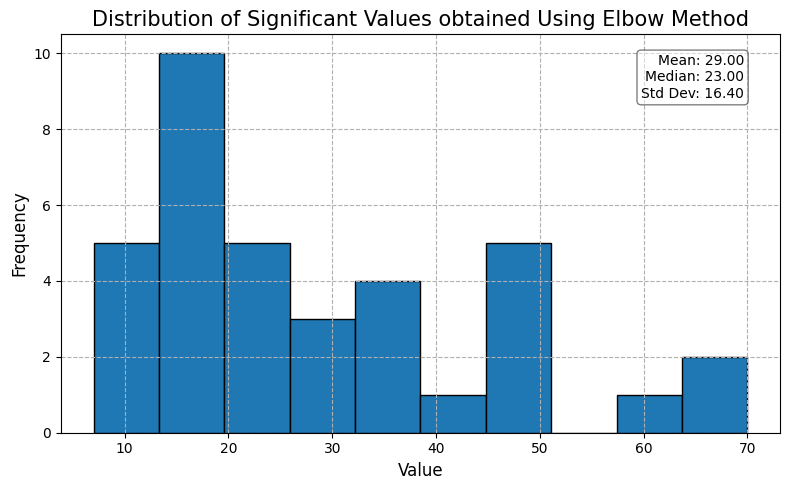

In [ ]:
plot_histogram(gini_coeffs, title="Distribution of GINI Coefficients")
plot_histogram(energy_counts, title="Distribution of Significant Values obtained Using Energy Ratio Test")
plot_histogram(elbow_counts, title="Distribution of Significant Values obtained Using Elbow Method")

In [ ]:
saved_elbow = elbow_counts
print(saved_elbow)

[49, 70, 32, 58, 45, 19, 51, 65, 16, 42, 51, 13, 22, 36, 15, 23, 51, 11, 21, 33, 15, 27, 34, 18, 19, 35, 15, 23, 32, 15, 15, 18, 13, 7, 24, 11]


In [ ]:
print(elbow_counts)

[49, 70, 32, 58, 45, 19, 51, 65, 16, 42, 51, 13, 22, 36, 15, 23, 51, 11, 21, 33, 15, 27, 34, 18, 19, 35, 15, 23, 32, 15, 15, 18, 13, 7, 24, 11]
